# 5. K-means for compression

## (a) K-Means Compression Implementation

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

Load the large image:

In [2]:
#A = imread('data/peppers-large.tiff')
A = np.load('data/peppers-large.npy')

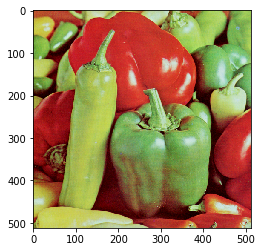

In [3]:
plt.imshow(A)
plt.show()

Load the smaller image:

In [4]:
#B = imread('data/peppers-small.tiff')
B = np.load('data/peppers-small.npy')

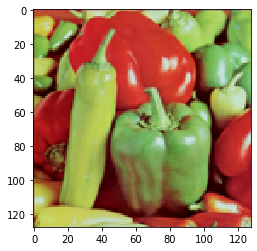

In [5]:
plt.imshow(B)
plt.show()

Define a function that assigns every example in a dataset to the closest centroid out of a given list of centroids:

In [6]:
def cluster_assignments(x, mu):
    """
    args:
        x: Design matrix, shape (m,n)
        mu: cluster centroids, shape (K,n)
    
    returns:
        c: cluster assignments, shape (m,)
           where x[i] is assigned to mu[c[i]] 
    """
    m,n = x.shape
    K = mu.shape[0]
    
    # pairwise differences d[i,j] = x[i]-mu[j]
    # shape (m,K,n)
    d = x.reshape((m,1,n))- mu
    
    # shape (m,K)
    norms = np.linalg.norm(d, axis=-1)
    
    # shape (m,)
    return np.argmin(norms, axis=-1)

Implement the K-Means algorithm:

In [7]:
def get_Kmeans(x, K=16):
    """
    args:
        x: Design matrix, shape (m,n)
        K: number of clusters, integer
        
    returns:
        mu: cluster centroids, shape (K,n)
    """
    m,n = x.shape
    
    # initialize random centroids    
    rng = np.random.default_rng()
    idx = rng.choice(m, size=K, replace=False)
    mu = x[idx]
    
    min_iter = 30
    max_iter = 1000
    it = 0
    converged = False
    
    # shape(m,)
    c =cluster_assignments(x,mu)
    
    while it < min_iter or (it < max_iter and not converged):
        it+=1
        mu_old = mu
        c_old = c
        
        # shape (m,)
        c = cluster_assignments(x,mu)
        converged = np.all(c_old == c)
        
        # cluster indicator matrix
        # shape (m, K)
        # note: it is important to cast this into an integer matrix,
        # otherwise matrix multiplication does not behave as intended 
        # (x has dtype=uint8, so we quickly run into overflow issues)
        idc = (c.reshape((m,1)) == np.arange(K)).astype('uint')

        mu = (idc.T @ x) / np.sum(idc.T, axis=1, keepdims=True)
    print("K-means converged after {} iterations.".format(it))
    return mu.astype('int')

Convenience function that computes the K-centroids for an image after preprocessing it:

In [8]:
def get_centroids(X,K=16):
    """
    compute centroids for compression
    
    args:
        X: image, array of shape (m1,m2,3)
        K: number of clusters
        
    returns:
        mu: centroids returned by K-means, array of shape (K,3)
    """
    # flatten X into a 2-dimensional array
    x = X.reshape((-1,3))
    return get_Kmeans(x, K)

Run K-means on the small image:

In [9]:
mu_B = get_centroids(B)

K-means converged after 109 iterations.


Define a function that let's us compare original and compressed images:

In [10]:
def compress(X, mu, show_original=True):
    """
    compress an image and compare before/after
    args:
        X: image to be compressed, array of shape (m1,m2,3)
        mu: centroids of the compression, array of shape (K,3)
    """
    # flatten the image data 
    a = X.reshape((-1,3))
    
    c = cluster_assignments(a,mu)
    C = mu[c].reshape(X.shape)
    
    if show_original:
        plt.figure()
        plt.title("Original image")
        plt.imshow(X)
    
    plt.figure()
    plt.title("Compressed image")
    plt.imshow(C)

Compress the large image with the centroids computed from the small image and compare result to original image:

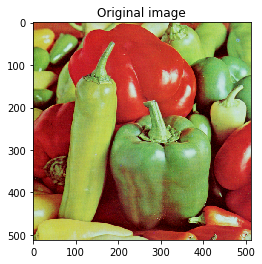

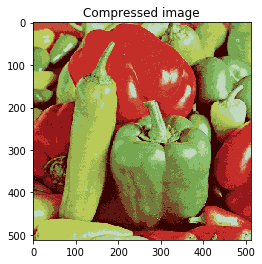

In [11]:
compress(A,mu_B)

## (b) Compression Factor

In the original picture every pixel was represented by 24 bits. In the compressed picture only $\log_2(16)=4$ bits are needed, which means the image was compressed by a factor of $6$.

Just for fun, let's compare compressions with 1 to 16 colors:

K-means converged after 30 iterations.
K-means converged after 30 iterations.
K-means converged after 30 iterations.
K-means converged after 30 iterations.
K-means converged after 65 iterations.
K-means converged after 65 iterations.
K-means converged after 30 iterations.
K-means converged after 30 iterations.
K-means converged after 46 iterations.
K-means converged after 49 iterations.
K-means converged after 81 iterations.
K-means converged after 47 iterations.
K-means converged after 107 iterations.
K-means converged after 95 iterations.
K-means converged after 56 iterations.
K-means converged after 71 iterations.


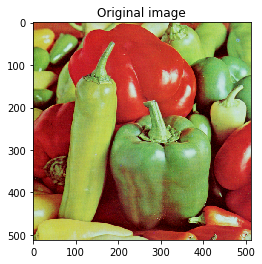

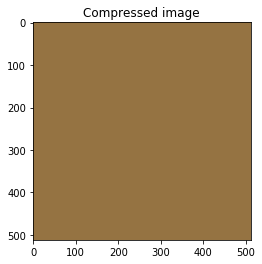

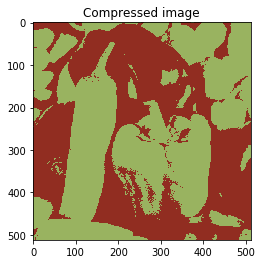

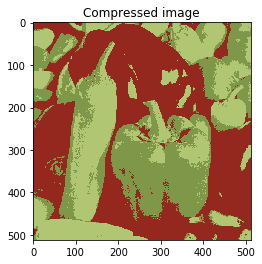

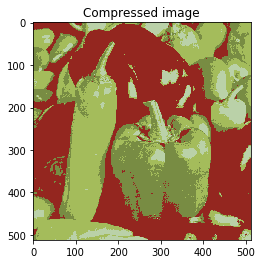

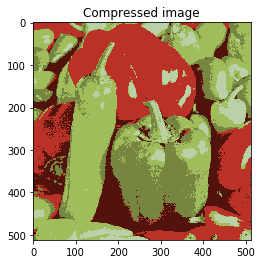

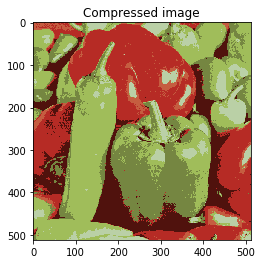

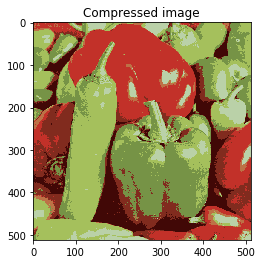

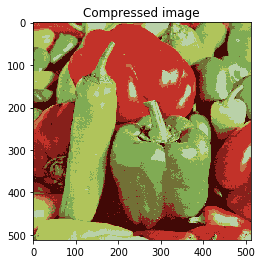

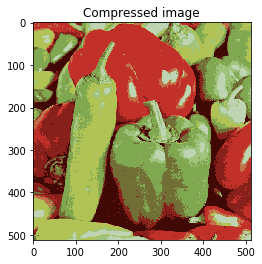

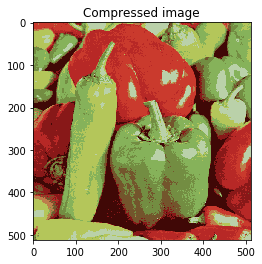

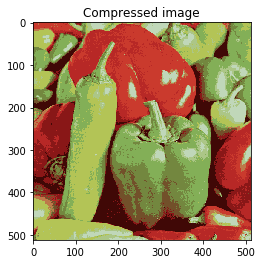

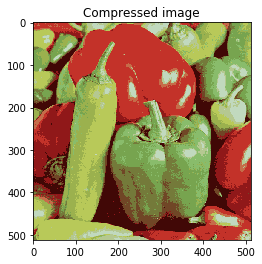

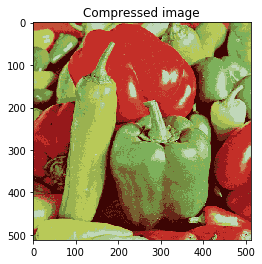

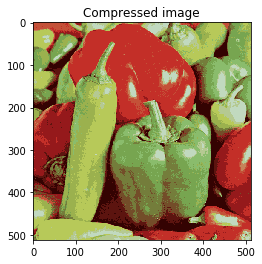

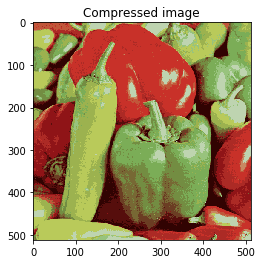

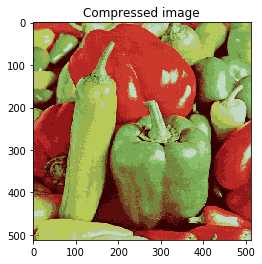

In [12]:
for K in range(1,17):
    mu= get_centroids(B, K)
    compress(A,mu, K==1)